In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Dataset Import
import statsmodels.api as sm

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras import optimizers
from keras.models import load_model

C:\Users\Acer\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [7]:
#Create a dummy variable for the women who had affair
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [8]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [9]:
df['Had_Affair'].value_counts()

0    4313
1    2053
Name: Had_Affair, dtype: int64

In [10]:
#Create dummies for occupations
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [11]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [12]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)
#X=df.drop(['Had_Affair','affairs'],axis=1)

In [13]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [14]:
#merge the control variables into vector X
X = pd.concat([X,dummies],axis=1)

In [15]:
#Drop reference group dummy variables to avoid collinearity problem
X = X.drop(['occ1','hocc1','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [16]:
#Define the dependent variable (in this case binary outcome variable, 1 = Had Affair, 0 = Had no Affair)
Y = df.Had_Affair

In [17]:
#Implement train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [18]:
len(X_train)

4774

In [19]:
len(X_test)

1592

In [20]:
X_train.shape

(4774, 16)

In [21]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

# model_1

In [75]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.002)))
model.add(Dropout(0.3))
#model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))

In [76]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(X_train,y_train,epochs=30,shuffle=True,validation_data=(X_test,y_test))

Train on 4774 samples, validate on 1592 samples
Epoch 1/30
4774/4774 [==============================] - 2s 419us/step - loss: 0.6760 - acc: 0.6667 - val_loss: 0.6119 - val_acc: 0.7073
Epoch 2/30
4774/4774 [==============================] - 0s 70us/step - loss: 0.6366 - acc: 0.6845 - val_loss: 0.5972 - val_acc: 0.7161
Epoch 3/30
4774/4774 [==============================] - 0s 70us/step - loss: 0.6138 - acc: 0.7021 - val_loss: 0.5886 - val_acc: 0.7268
Epoch 4/30
4774/4774 [==============================] - 0s 80us/step - loss: 0.6082 - acc: 0.7065 - val_loss: 0.5797 - val_acc: 0.7343
Epoch 5/30
4774/4774 [==============================] - 0s 70us/step - loss: 0.5998 - acc: 0.7097 - val_loss: 0.5735 - val_acc: 0.7318
Epoch 6/30
4774/4774 [==============================] - 0s 89us/step - loss: 0.5898 - acc: 0.7168 - val_loss: 0.5704 - val_acc: 0.7274
Epoch 7/30
4774/4774 [==============================] - 0s 92us/step - loss: 0.5850 - acc: 0.7155 - val_loss: 0.5639 - val_acc: 0.7299
Epoch 

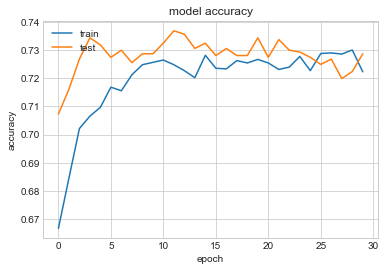

In [79]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
print("Train: ",roc_auc_score(y_train, model.predict_proba(X_train)))
print("Test: ",roc_auc_score(y_test,model.predict_proba(X_test)))

Train:  0.7717452701060494
Test:  0.7535116407982261


# model_2

In [66]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.002)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu',kernel_regularizer=l2(0.002)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))

In [71]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
history = model.fit(X_train,y_train,epochs=30,shuffle=True,validation_data=(X_test,y_test))

Train on 4774 samples, validate on 1592 samples
Epoch 1/30
4774/4774 [==============================] - 2s 405us/step - loss: 0.5508 - acc: 0.7237 - val_loss: 0.5398 - val_acc: 0.7293
Epoch 2/30
4774/4774 [==============================] - 0s 80us/step - loss: 0.5475 - acc: 0.7275 - val_loss: 0.5421 - val_acc: 0.7318
Epoch 3/30
4774/4774 [==============================] - 0s 94us/step - loss: 0.5492 - acc: 0.7306 - val_loss: 0.5393 - val_acc: 0.7318
Epoch 4/30
4774/4774 [==============================] - 0s 94us/step - loss: 0.5470 - acc: 0.7283 - val_loss: 0.5410 - val_acc: 0.7261
Epoch 5/30
4774/4774 [==============================] - 0s 81us/step - loss: 0.5520 - acc: 0.7283 - val_loss: 0.5418 - val_acc: 0.7293
Epoch 6/30
4774/4774 [==============================] - 0s 89us/step - loss: 0.5477 - acc: 0.7275 - val_loss: 0.5409 - val_acc: 0.7286
Epoch 7/30
4774/4774 [==============================] - 0s 100us/step - loss: 0.5488 - acc: 0.7229 - val_loss: 0.5409 - val_acc: 0.7305
Epoch

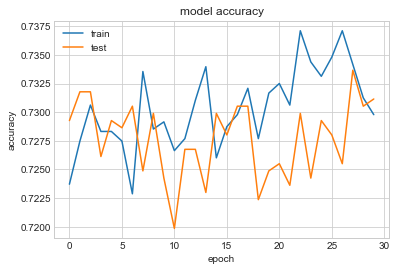

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
print("Train: ",roc_auc_score(y_train, model.predict_proba(X_train)))
print("Test: ",roc_auc_score(y_test,model.predict_proba(X_test)))

Train:  0.7770762515270184
Test:  0.7495953436807096
